# INTRODUCTION/MOTIVATION

After nearly three decades since the dawn of the internet, the world has seen exponential growth in the advancement of information technology, which led to improvements in quality of life that we enjoy today such as online communications, access to information, and cashless transactions. While it definitely has amplified the convenience of many facets in life, what inevitably followed is the danger of social engineering. Although it may be less evident, clickbaiting may arguably be considered as one of these given that it lures people into consuming misleading content. As such this study aims to investigate the nature of this phenomenon, specifically by analyzing news headlines and delving into the common words used as well as the subject matter of the article. With this, the proponents hope to bring awareness towards the tendencies of such a phenomenon so that the public can discern and be more critical of the content that they consume.

# PROBLEM STATEMENT/S

The advancements in technology have led society towards a digital space of information overload and noise, generating a wave of clickbait and misleading information even in journalism. Today, internet consumers have become the victims of misinformation or “fake news” as an increasing number of sites use exaggerated titles or “emotional traps” to stand out and gain foot traffic in a world of digital oversaturation. Overall, information literacy has been negatively impacted by such practices from these sites. 
</br>
</br>
In order to elaborate on these concerns, the group seeks to answer the following questions:
1. What words are commonly used in clickbait and non-clickbait headlines?
2. What topics are commonly talked about in clickbait and non-clickbait articles?
3. What distinguishes clickbait from non-clickbait? 
4. }|How to predict if a headline is clickbait or non-clickbait?


# DATA DESCRIPTION

The dataset that the group will be using is entitled ‘Clickbait Dataset” and was obtained from [Kaggle](https://www.kaggle.com/datasets/amananandrai/clickbait-dataset).
</br>
</br>
The clickbait headlines are collected from sites such as ‘BuzzFeed’, ‘Upworthy’, ‘ViralNova’, ‘Thatscoop’, ‘Scoopwhoop’ and ‘ViralStories’.
The relevant or non-clickbait headlines are collected from many trustworthy news sites such as ‘WikiNews’, ’New York Times’, ‘The Guardian’, and ‘The Hindu’.


# CLUSTERING AND EXPLORATORY DATA ANALYSIS
## Clickbait vs Non-Clickbait Headlines

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy==3.3.0
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 34.2 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.1/671.1 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 65.6 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.2
    Uninstalling pydantic-1.10.2:
      Successfully uninstalled pydantic-1.10.2
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Uninstalling thinc-8.1.5:
      Successfully uninstalled thinc-8.1.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently t

In [2]:
import pandas as pd
import numpy as np
import nltk
import plotly.io as pio
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from tqdm.notebook import tqdm
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string
import spacy
from sklearn.decomposition import PCA

nltk_stopwords = stopwords.words('english')
en = spacy.load('en_core_web_sm') # loading the spacy package
spacy_stopwords = list(en.Defaults.stop_words) # retrieve spacy stopwords

stop_words = (nltk_stopwords + spacy_stopwords + 
              list(string.punctuation))
pio.renderers.default = "plotly_mimetype+notebook"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [31]:
df = pd.read_csv('/content/drive/MyDrive/Group Project/clickbait.csv') # Loading CSV file through Pandas
df = df.dropna()
df = df.sample(frac=1, random_state=1)
df.reset_index(inplace = True,drop = True)
df

,headline,clickbait
0,Everyone Stop And Appreciate Zac Efron Touchin...,1
1,Are You Ready To Sync Your Vagina With Your Sm...,1
2,25 Insanely Delicious Things To Make With 3 In...,1
3,MGM Mirage Reaches Deal on Las Vegas Project,0
4,This Is Why Soy Milk Goes Funny In Your Coffee,1
...,...,...
31995,Police Chief Plays Down I.R.A. Groups in Ulster,0
31996,Demi Lovato Performs Next To Giant Boner,1
31997,Regular People Try To Catch Passes From An NFL...,1
31998,This Is Why You Don't Fuck With A Crocodile,1


### CLEANING NOT CLICKBAIT (clickbait = 0)

In [ ]:
#get only non-clickbait headlines (clickbait=0)

df_notbait = df[df['clickbait'] == 0]
df_notbait

#reset index
df_notbait = df_notbait.reset_index()

#get rid of 'index' column
del df_notbait['index']

df_notbait

,headline,clickbait
0,Bill Changing Credit Card Rules Is Sent to Oba...,0
1,"In Hollywood, the Easy-Money Generation Toughe...",0
2,1700 runners still unaccounted for in UK's Lak...,0
3,Yankees Pitchers Trade Fielding Drills for Put...,0
4,Large earthquake rattles Indonesia; Seventh in...,0
...,...,...
15996,"To Make Female Hearts Flutter in Iraq, Throw a...",0
15997,"British Liberal Democrat Patsy Calton, 56, die...",0
15998,Drone smartphone app to help heart attack vict...,0
15999,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [23]:
# remove unnecessary punctuations, numbers
regex_tokenizer = RegexpTokenizer(r'[^\s,\.\-\?!:;\(\)\"\"\$\%\&\*\/\’\'0-9]+') 

# regex tokenization
df_notbait['re_tokenized_headline'] = [' '.join(
    regex_tokenizer.tokenize(df_notbait['headline'][i].lower())) 
                           for i in tqdm(range(df_notbait.shape[0]))]

NameError: ignored

In [24]:
#Passing on whitespace tokenizer just to be sure

whitespace_tokenizer = WhitespaceTokenizer()

# whitespace tokenization
df_notbait['ws_tokenized_headline'] = [' '.join(
    whitespace_tokenizer.tokenize(df_notbait['re_tokenized_headline'][i].lower())) 
                              for i in tqdm(range(df_notbait.shape[0]))]

NameError: ignored

In [ ]:
#Removing stop words
df_notbait['stopped_headline'] = ([" ".join([text for text in 
                                   [word for word in 
                                    (df_notbait['ws_tokenized_headline'].values[i].split())] 
                                   if text not in stop_words]) 
                         for i in tqdm(range(df_notbait.shape[0]))])

NameError: ignored

In [ ]:
df_notbait['spacy_lemmatized_headline'] = ([" ".join([token.lemma_ for token in
                                        en(df_notbait['stopped_headline'].values[i])]) 
                              for i in tqdm(range(df_notbait.shape[0]))])

  0%|          | 0/16001 [00:00<?, ?it/s]

In [ ]:
# vectorize nonbait news
vectorizer = TfidfVectorizer(min_df=0.001, max_df=0.9,
                             token_pattern=r'(?u)\b[#A-Za-z]{3,}\b',
                             stop_words=stop_words)
X = vectorizer.fit_transform(df_notbait[df_notbait['clickbait']==0]['spacy_lemmatized_headline'])
X

<16001x1176 sparse matrix of type '<class 'numpy.float64'>'
	with 59293 stored elements in Compressed Sparse Row format>

In [ ]:
#bag of words
df_notbait_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df_notbait_bow

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,abortion,abuse,accept,access,accident,accord,account,accuse,acquire,act,...,yahoo,yankee,year,yemen,york,young,youth,youtube,zealand,zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.702829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df_notbait_bow.to_csv('/content/drive/MyDrive/Group Project/df_notbait_bow.csv')
df_notbait_bow = pd.read_csv('/content/drive/MyDrive/Group Project/df_notbait_bow.csv')

### K-MEANS CLUSTERING NOT CLICKBAIT

In [ ]:
inertias_list = []
calinski_harabasz_score_list = [] 
predictions_list = []

for k in tqdm(range(2, 8)):
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(df_notbait_bow.to_numpy())
    inertias_list.append(kmeans_model.inertia_)
    cluster_predictions = kmeans_model.labels_ 
    predictions_list.append(cluster_predictions)
    calinski_harabasz_score_list.append(
        calinski_harabasz_score(df_notbait_bow.to_numpy(), cluster_predictions))

  0%|          | 0/6 [00:00<?, ?it/s]

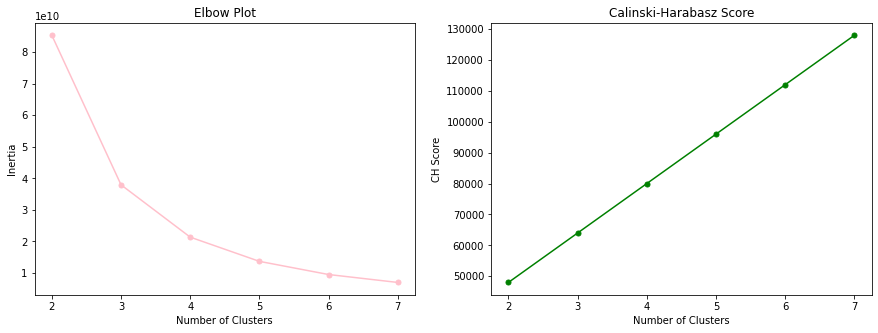

In [ ]:

fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)

ax = ax.flatten()

ax[0].plot(list(range(2, 8)), inertias_list, 
           marker='.', markersize=10, color='pink')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Elbow Plot')

ax[1].plot(list(range(2, 8)), calinski_harabasz_score_list, 
           marker='.', markersize=10, color='green')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('CH Score')
ax[1].set_title('Calinski-Harabasz Score')

plt.show()

Based on the elbow method, the optimal number of clusters is 2. The Calinski-Harabasz score, on the other hand, reveals that the optimal number of clusters is 2.

In [ ]:
#dimensionality reduction

svd = TruncatedSVD(n_components=2, random_state=143)
df_notbait_bow_svd = svd.fit_transform(df_notbait_bow.to_numpy())

df_notbait_bow_svd

array([[ 6.19315596e-07, -8.93062099e-03],
       [ 1.00000013e+00, -2.39832998e-03],
       [ 2.00000019e+00, -1.89889543e-03],
       ...,
       [ 1.59980000e+04, -2.02266292e-02],
       [ 1.59990000e+04, -2.03085561e-02],
       [ 1.60000000e+04, -2.21050147e-02]])

In [ ]:
predictions_list

[array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 array([5, 5, 5, ..., 1, 1, 1], dtype=int32),
 array([3, 3, 3, ..., 6, 6, 6], dtype=int32)]

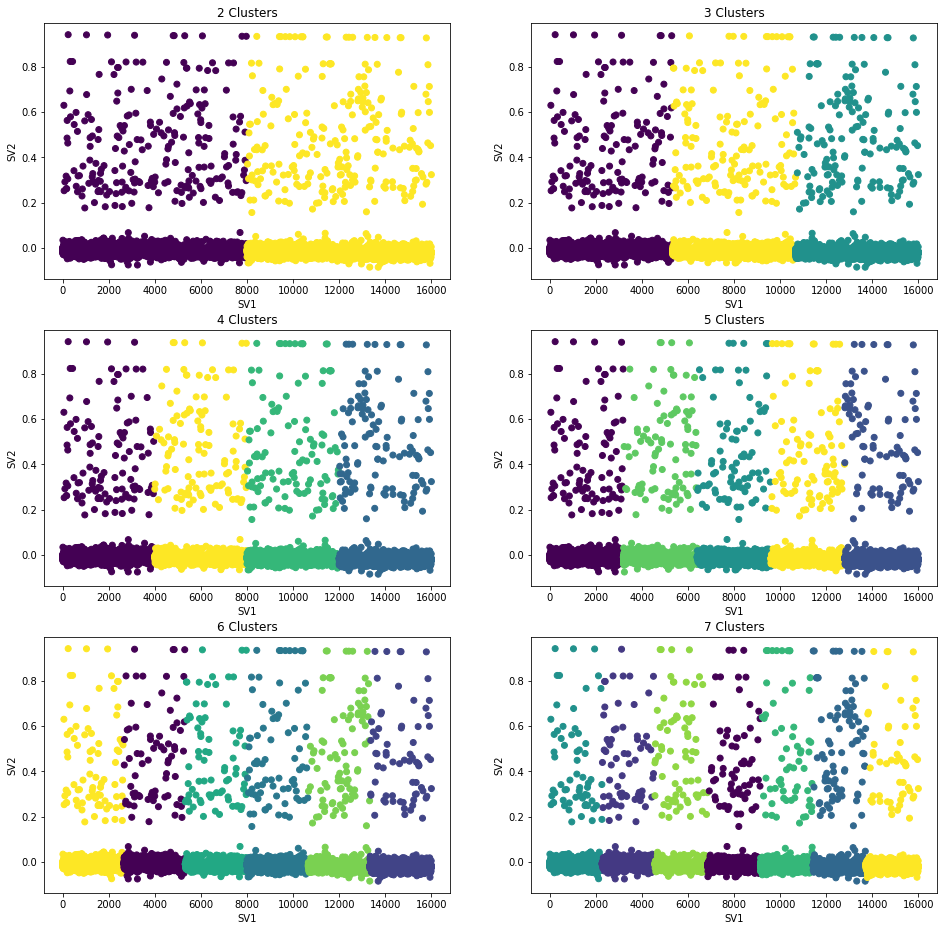

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))
ax = ax.flatten()


for i in range(6):
    ax[i].scatter(df_notbait_bow_svd[:, 0], df_notbait_bow_svd[:, 1], c=predictions_list[i])
    ax[i].set_title(f'{i+2} Clusters')
    ax[i].set_xlabel('SV1')
    ax[i].set_ylabel('SV2')

In [ ]:
# Word Cloud for not clickbait

# Creating new dataframe for word cloud
notbait = df_notbait_bow[df_notbait_bow.columns]

# Since optimal cluster for non-clickbait is 3, n_clusters = 3; 
# adding cluster predictions into the df for easy reference later on
clust = KMeans(n_clusters=3)
clust.fit(notbait)
notbait['clust_predict'] = clust.predict(notbait)

notbait

,Unnamed: 0,abortion,abuse,accept,access,accident,accord,account,accuse,acquire,...,yankee,year,yemen,york,young,youth,youtube,zealand,zimbabwe,clust_predict
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.702829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15996,15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
15997,15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
15998,15998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
15999,15999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

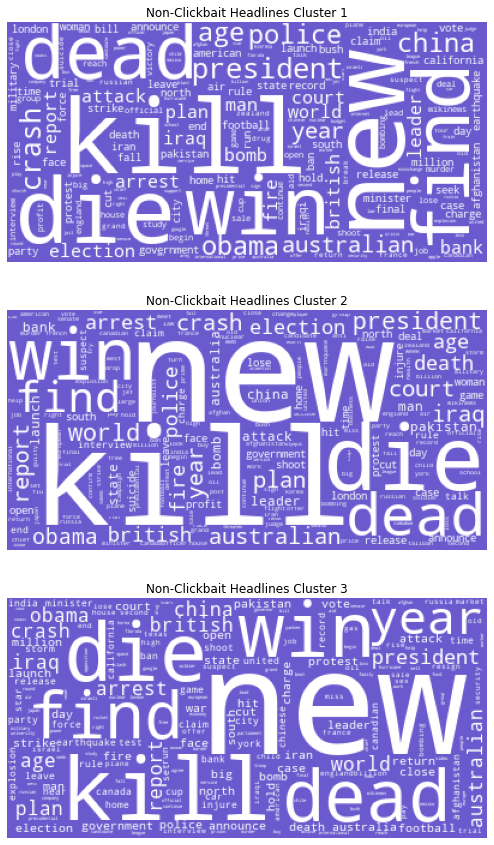

In [ ]:
notbait_c1 = notbait[notbait['clust_predict']==0].drop(columns=['clust_predict', 'Unnamed: 0']).sum(axis=0).sort_values(ascending=False)[:]
notbait_c1_wordCloud = WordCloud(background_color='slateblue', relative_scaling=0.5,
                          colormap=ListedColormap(['#FFFFFF'])) 

notbait_c2 = notbait[notbait['clust_predict']==1].drop(columns=['clust_predict', 'Unnamed: 0']).sum(axis=0).sort_values(ascending=False)[:]
notbait_c2_wordCloud = WordCloud(background_color='slateblue', relative_scaling=0.5,
                          colormap=ListedColormap(['#FFFFFF'])) 
notbait_c3 = notbait[notbait['clust_predict']==2].drop(columns=['clust_predict', 'Unnamed: 0']).sum(axis=0).sort_values(ascending=False)[:]
notbait_c3_wordCloud = WordCloud(background_color='slateblue', relative_scaling=0.5,
                          colormap=ListedColormap(['#FFFFFF']))

notbait_c1_wordCloud.generate_from_frequencies(notbait_c1)
notbait_c2_wordCloud.generate_from_frequencies(notbait_c2)
notbait_c3_wordCloud.generate_from_frequencies(notbait_c3)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

ax[0].imshow(notbait_c1_wordCloud)
ax[0].axis('off')
ax[0].set_title('Non-Clickbait Headlines Cluster 1')
ax[1].imshow(notbait_c2_wordCloud)
ax[1].axis('off')
ax[1].set_title('Non-Clickbait Headlines Cluster 2')
ax[2].imshow(notbait_c3_wordCloud)
ax[2].axis('off')
ax[2].set_title('Non-Clickbait Headlines Cluster 3')

plt.show()

### HIERARCHICAL CLUSTERING NON CLICKBAIT

In [43]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [44]:
Z1 = linkage(df_notbait_bow[df_notbait_bow.columns],
            method='ward', optimal_ordering=True)

NameError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(2, 12), np.sort(Z1[:, 2])[::-1][:10], marker='o', color='crimson',
        label='SSE')
ax.set_ylabel('t')
ax.set_xlabel('Number of clusters')
ax.set_title(r'Visualizing SSE and the Merging Cost $\Delta$ of Non-clickbait Headlines', fontsize=16)
ax2 = ax.twinx()
ax2.bar(range(3, 12), abs(np.diff(np.sort(Z1[:, 2])[::-1][:10])),
        color='slateblue', alpha=0.5, label=r'$\Delta t$')
ax2.set_ylabel(r'$\Delta t$')
plt.show()

Optimal number of clusters is 3.

In [ ]:
fig, ax = plt.subplots(figsize=(12,4), dpi=200)
dn = dendrogram(Z1, ax=ax, truncate_mode='level', p=5, color_threshold=10)
ax.axhline(10, color='black', linestyle=':')
ax.set_ylabel(r'$\Delta$');

In [ ]:
Z1_predict_cluster = fcluster(Z1, t=10, criterion='distance')
Z1_predict_cluster

In [ ]:
bins, freq = np.unique(Z1_predict_cluster, return_counts=True)
for i, j in zip(bins, freq):
    print(f'Cluster {i} has {j} elements.')

In [ ]:
dim_reduce = PCA(n_components=2)

pca_data_notbait = dim_reduce.fit_transform(df_notbait_bow)
pca_data_notbait

In [ ]:
# Visualization of Hierarchical Clustering

plt.figure(figsize=(10, 8))
plt.scatter(pca_data_notbait[:, 0], pca_data_notbait[:, 1], c=Z1_predict_cluster)
plt.title('Cluster Predictions for Hierarchical Clustering of Non-clickbait Headlines')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### *END OF NOT CLICKBAIT CLUSTERING*

### CLEANING CLICKBAIT (clickbait=1)

In [ ]:
#get only non-clickbait headlines (clickbait=0)

df_bait = df[df['clickbait'] == 1]
df_bait

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
15994,"There Was A Mini ""Sisterhood Of The Traveling ...",1
15995,21 Dogs Who Are Thankful For Their Best Friends,1
15996,People Are Proving No Dick Is Too Big By Dropp...,1
15997,"I'm An Atheist, But I'm Not",1


In [ ]:
# remove unnecessary punctuations, numbers
regex_tokenizer = RegexpTokenizer(r'[^\s,\.\-\?!:;\(\)\"\"\$\%\&\*\/\’\'0-9]+') 

# regex tokenization
df_bait['re_tokenized_headline'] = [' '.join(
    regex_tokenizer.tokenize(df_bait['headline'][i].lower())) 
                           for i in tqdm(range(df_bait.shape[0]))]

  0%|          | 0/15999 [00:00<?, ?it/s]

<ipython-input-11-faf83bc9eea3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Passing on whitespace tokenizer just to be sure

whitespace_tokenizer = WhitespaceTokenizer()

# whitespace tokenization
df_bait['ws_tokenized_headline'] = [' '.join(
    whitespace_tokenizer.tokenize(df_bait['re_tokenized_headline'][i].lower())) 
                              for i in tqdm(range(df_bait.shape[0]))]

  0%|          | 0/15999 [00:00<?, ?it/s]

<ipython-input-12-de580ea10306>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Removing stop words
df_bait['stopped_headline'] = ([" ".join([text for text in 
                                   [word for word in 
                                    (df_bait['ws_tokenized_headline'].values[i].split())] 
                                   if text not in stop_words]) 
                         for i in tqdm(range(df_bait.shape[0]))])

  0%|          | 0/15999 [00:00<?, ?it/s]

<ipython-input-18-35f852e6d677>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_bait['spacy_lemmatized_headline'] = ([" ".join([token.lemma_ for token in
                                        en(df_bait['stopped_headline'].values[i])]) 
                              for i in tqdm(range(df_bait.shape[0]))])

  0%|          | 0/15999 [00:00<?, ?it/s]

<ipython-input-19-338e9ecc6900>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# vectorize bait news
vectorizer = TfidfVectorizer(min_df=0.001, max_df=0.9,
                             token_pattern=r'(?u)\b[#A-Za-z]{3,}\b',
                             stop_words=stop_words)
X = vectorizer.fit_transform(df_bait[df_bait['clickbait']==1]['spacy_lemmatized_headline'])
X

<15999x905 sparse matrix of type '<class 'numpy.float64'>'
	with 55935 stored elements in Compressed Sparse Row format>

In [ ]:
#bag of words
df_bait_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df_bait_bow

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,able,absolute,absolutely,accidentally,accord,account,accurate,act,actor,actual,...,write,wrong,wtf,year,york,young,youtube,zac,zayn,zodiac
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.397893,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
15995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df_bait_bow.to_csv('/content/drive/MyDrive/Group Project/df_bait_bow.csv')
df_bait_bow = pd.read_csv('/content/drive/MyDrive/Group Project/df_bait_bow.csv') 

### K-MEANS CLUSTERING CLICKBAIT

In [ ]:
inertias_list = []
calinski_harabasz_score_list = [] 
predictions_list = []

for k in tqdm(range(2, 8)):
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(df_bait_bow.to_numpy())
    inertias_list.append(kmeans_model.inertia_)
    cluster_predictions = kmeans_model.labels_ 
    predictions_list.append(cluster_predictions)
    calinski_harabasz_score_list.append(
        calinski_harabasz_score(df_bait_bow.to_numpy(), cluster_predictions))

  0%|          | 0/6 [00:00<?, ?it/s]

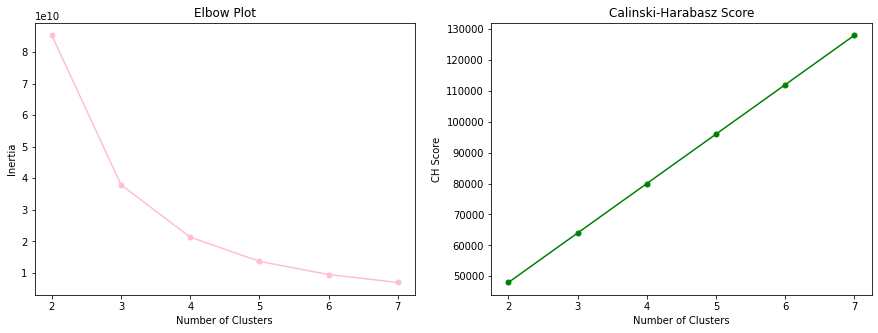

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)

ax = ax.flatten()

ax[0].plot(list(range(2, 8)), inertias_list, 
           marker='.', markersize=10, color='pink')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Elbow Plot')

ax[1].plot(list(range(2, 8)), calinski_harabasz_score_list, 
           marker='.', markersize=10, color='green')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('CH Score')
ax[1].set_title('Calinski-Harabasz Score')

plt.show()

Based on the elbow method, the optimal number of clusters is 3. The Calinski-Harabasz score, on the other hand, reveals that the optimal number of clusters is 3 because 2's score is higher than 2.

In [ ]:
#dimensionality reduction

svd = TruncatedSVD(n_components=2, random_state=143)
df_bait_bow_svd = svd.fit_transform(df_bait_bow.to_numpy())

df_bait_bow_svd

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.00000048e+00,  5.98367443e-03],
       [ 2.00000081e+00, -1.03215483e-02],
       ...,
       [ 1.59960000e+04, -2.62220940e-02],
       [ 1.59970000e+04, -6.08842333e-02],
       [ 1.59980000e+04, -6.82296344e-02]])

In [ ]:
predictions_list

[array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 array([2, 2, 2, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 array([2, 2, 2, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 0, ..., 3, 3, 3], dtype=int32),
 array([3, 3, 3, ..., 6, 6, 6], dtype=int32)]

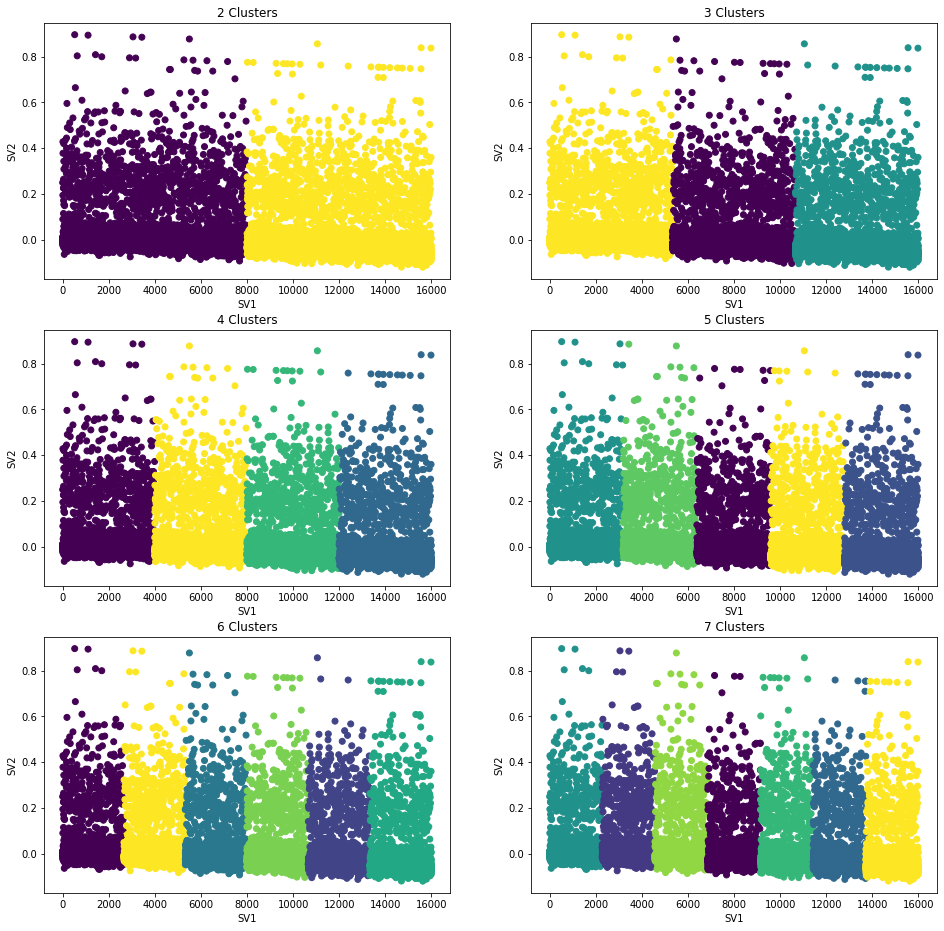

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))
ax = ax.flatten()


for i in range(6):
    ax[i].scatter(df_bait_bow_svd[:, 0], df_bait_bow_svd[:, 1], c=predictions_list[i])
    ax[i].set_title(f'{i+2} Clusters')
    ax[i].set_xlabel('SV1')
    ax[i].set_ylabel('SV2')

In [ ]:
# Word Cloud for clickbait

# Creating new dataframe for word cloud
bait = df_bait_bow[df_bait_bow.columns]

# Since optimal cluster for nclickbait is 2, n_clusters = 2; 
# adding cluster predictions into the df for easy reference later on
clust = KMeans(n_clusters=3)
clust.fit(bait)
bait['clust_predict'] = clust.predict(bait)

bait

,Unnamed: 0,able,absolute,absolutely,accidentally,accord,account,accurate,act,actor,...,wrong,wtf,year,york,young,youtube,zac,zayn,zodiac,clust_predict
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.397893,0.0,0.0,0.0,0.0,0.0,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,15994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
15995,15995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
15996,15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
15997,15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1


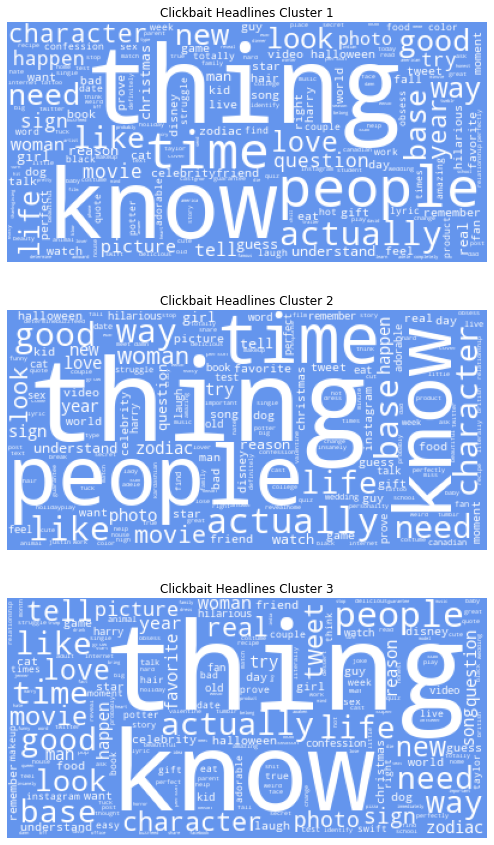

In [ ]:
bait_c1 = bait[bait['clust_predict']==0].drop(columns=['clust_predict', 'Unnamed: 0']).sum(axis=0).sort_values(ascending=False)[:]
bait_c1_wordCloud = WordCloud(background_color='cornflowerblue', relative_scaling=0.5,
                          colormap=ListedColormap(['#FFFFFF'])) 

bait_c2 = bait[bait['clust_predict']==1].drop(columns=['clust_predict', 'Unnamed: 0']).sum(axis=0).sort_values(ascending=False)[:]
bait_c2_wordCloud = WordCloud(background_color='cornflowerblue', relative_scaling=0.5,
                          colormap=ListedColormap(['#FFFFFF']))
bait_c3 = bait[bait['clust_predict']==2].drop(columns=['clust_predict', 'Unnamed: 0']).sum(axis=0).sort_values(ascending=False)[:]
bait_c3_wordCloud = WordCloud(background_color='cornflowerblue', relative_scaling=0.5,
                          colormap=ListedColormap(['#FFFFFF'])) 

bait_c1_wordCloud.generate_from_frequencies(bait_c1)
bait_c2_wordCloud.generate_from_frequencies(bait_c2)
bait_c3_wordCloud.generate_from_frequencies(bait_c3)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

ax[0].imshow(bait_c1_wordCloud)
ax[0].axis('off')
ax[0].set_title('Clickbait Headlines Cluster 1')
ax[1].imshow(bait_c2_wordCloud)
ax[1].axis('off')
ax[1].set_title('Clickbait Headlines Cluster 2')
ax[2].imshow(bait_c3_wordCloud)
ax[2].axis('off')
ax[2].set_title('Clickbait Headlines Cluster 3')

plt.show()

### HIERARCHICAL CLUSTERING CLICKBAIT

In [ ]:
Z2 = linkage(df_bait_bow[df_bait_bow.columns],
            method='ward', optimal_ordering=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(2, 12), np.sort(Z2[:, 2])[::-1][:10], marker='o', color='crimson',
        label='SSE')
ax.set_ylabel('t')
ax.set_xlabel('Number of clusters')
ax.set_title(r'Visualizing SSE and the Merging Cost $\Delta$ of Clickbait Headlines', fontsize=16)
ax2 = ax.twinx()
ax2.bar(range(3, 12), abs(np.diff(np.sort(Z2[:, 2])[::-1][:10])),
        color='slateblue', alpha=0.5, label=r'$\Delta t$')
ax2.set_ylabel(r'$\Delta t$')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,4), dpi=200)
dn = dendrogram(Z2, ax=ax, truncate_mode='level', p=5, color_threshold=9.5)
ax.axhline(9.5, color='black', linestyle=':')
ax.set_ylabel(r'$\Delta$');

In [ ]:
Z2_predict_cluster = fcluster(Z2, t=9.5, criterion='distance')
Z2_predict_cluster

In [ ]:
bins, freq = np.unique(Z2_predict_cluster, return_counts=True)
for i, j in zip(bins, freq):
    print(f'Cluster {i} has {j} elements.')

In [ ]:
dim_reduce = PCA(n_components=2)

pca_data_bait = dim_reduce.fit_transform(df_bait_bow)
pca_data_bait

In [ ]:
# Visualization of Hierarchical Clustering

plt.figure(figsize=(10, 8))
plt.scatter(pca_data_bait[:, 0], pca_data_bait[:, 1], c=Z2_predict_cluster)
plt.title('Cluster Predictions for Hierarchical Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
#WORD CLOUD (HIERARCHICAL CLUSTERING) FOR CLICKBAIT

bait_words = df_bait_bow[df_bait_bow.columns]


bait_words['clust'] = Z2_predict_cluster.tolist()


bait_words_c1 = bait_words[bait_words['clust']==1].drop(columns='clust').sum(axis=0).sort_values(ascending=False)[:]
bait_wordCloud_c1 = WordCloud(background_color='mediumorchid', relative_scaling=0.5,
                          colormap=ListedColormap(['#FFFFFF'])) 

bait_words_c2 = bait_words[bait_words['clust']==2].drop(columns='clust').sum(axis=0).sort_values(ascending=False)[:]
bait_wordCloud_c2 = WordCloud(background_color='palevioletred', relative_scaling=0.5,
                          colormap=ListedColormap(['#FFFFFF'])) 

bait_words_c3 = bait_words[bait_words['clust']==3].drop(columns='clust').sum(axis=0).sort_values(ascending=False)[:]
bait_wordCloud_c3 = WordCloud(background_color='crimson', relative_scaling=0.5,
                          colormap=ListedColormap(['#FFFFFF'])) 

bait_wordCloud_c1.generate_from_frequencies(bait_words_c1)
bait_wordCloud_c2.generate_from_frequencies(bait_words_c2)
bait_wordCloud_c3.generate_from_frequencies(bait_words_c3)


fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

ax[0].imshow(bait_wordCloud_c1)
ax[0].axis('off')
ax[0].set_title('Clickbait Headlines Cluster 1')
ax[1].imshow(bait_wordCloud_c2)
ax[1].axis('off')
ax[1].set_title('Clickbait Headlines Cluster 2')
ax[2].imshow(bait_wordCloud_c3)
ax[2].axis('off')
ax[2].set_title('Clickbait Headlines Cluster 3')

plt.show()

# Predicting clickbaits over non-clickbaits

In [26]:
df = df.sample(frac=1, random_state=1)
# remove unnecessary punctuations, numbers
regex_tokenizer = RegexpTokenizer(r'[^\s,\.\-\?!:;\(\)\"\"\$\%\&\*\/\’\'0-9]+') 

# regex tokenization
df['re_tokenized_headline'] = [' '.join(
    regex_tokenizer.tokenize(df['headline'][i].lower())) 
                           for i in tqdm(range(df.shape[0]))]
#Passing on whitespace tokenizer just to be sure

whitespace_tokenizer = WhitespaceTokenizer()

# whitespace tokenization
df['ws_tokenized_headline'] = [' '.join(
    whitespace_tokenizer.tokenize(df['re_tokenized_headline'][i].lower())) 
                              for i in tqdm(range(df.shape[0]))]
#Removing stop words
df['stopped_headline'] = ([" ".join([text for text in 
                                   [word for word in 
                                    (df['ws_tokenized_headline'].values[i].split())] 
                                   if text not in stop_words]) 
                         for i in tqdm(range(df.shape[0]))])
df['spacy_lemmatized_headline'] = ([" ".join([token.lemma_ for token in
                                        en(df['stopped_headline'].values[i])]) 
                              for i in tqdm(range(df.shape[0]))])
# vectorize nonbait news
vectorizer = TfidfVectorizer(min_df=0.001, max_df=0.9,
                             token_pattern=r'(?u)\b[#A-Za-z]{3,}\b',
                             stop_words=stop_words)
X = vectorizer.fit_transform(df['spacy_lemmatized_headline'])

  0%|          | 0/32000 [00:00<?, ?it/s]

  0%|          | 0/32000 [00:00<?, ?it/s]

  0%|          | 0/32000 [00:00<?, ?it/s]

  0%|          | 0/32000 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,absolutely,abuse,accident,accord,account,accuse,act,action,activist,actor,...,write,wrong,yankee,year,york,young,youtube,zealand,zimbabwe,zodiac
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df1['clickbait'] = df['clickbait']
df1.to_csv('/content/drive/MyDrive/Group Project/df1.csv')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [39]:
train = df1.head(10000)
train_x = train.iloc[:,:-1]
test = df1.tail(2000)

In [40]:
#refitting best parameter
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150)
tool = rfc.fit(train_x,train['clickbait'])

In [42]:
import joblib
joblib.dump(rfc, '/content/drive/MyDrive/Group Project/rfc.sav')

['/content/drive/MyDrive/Group Project/rfc.sav']

In [41]:
#Testing same model to test dataset
test1 = test.iloc[:,:-1]
result = tool.predict(test1)
real = test['clickbait'].to_numpy(copy=True)
count = 0
for i in range(len(test['clickbait'])):
  if result[i] == real[i]:
    count +=1
print('Accuracy:', count/len(real))

Accuracy: 0.4965


# RESULTS ANALYSIS 

Clickbait headlines use directive and sensational language to create claims that peak consumer interest. In the first cluster, the most evident words seen are “zodiac”, “sign” and “base” followed by “character”, “know” and “favorite”. This combination suggests that astrology and other personalized tests are highly engaging as people seek to increase their self-awareness or validate their self-concept. In the second cluster, the most evident words seen are “thing”, “people” and “time” followed by “know”, “like”, “need”, “new”, “actually”, “life”, “good” and “love”. This combination can suggest that people are interested in learning something new or personal about life, themselves or others. In the third cluster, the most evident words seen are “base”, “know” and “question” followed by “harry”, “favorite”, “celebrity”, “need”, “potter” and “guess”. This combination suggests that people are interested in shocking and superficial content. Overall, the clickbait clusters use words that sensationalize or personalize information to incite emotion and attachment towards topics. This attracts consumers as it increases curiosity and interest, thereby increasing conversion to these sites as people click to “know more”.
</br>
</br>
On the other hand, non-clickbait headlines use more specific, neutral and informative language. In the first cluster, the most evident words revolve around death, aging, and public figures such as singers, actors and authors. In the second cluster, the most evident words are “new”, “win”, “kill” and “find” followed by “president”, “obama”, “china”, “dead”, “year”, “australian”, “plan” and “court”. In the third cluster, the most evident words are “kill”, “crash”, “pakistan” and “bomb” followed by “attack”, “afghanistan”, “blast”, “bombing”, “dead'', “suicide” and “plane”. Overall, the non-clickbait clusters include specific key details and information that can precisely reflect relevant topics and content delivered in a period of time. These are highly informative as they get direct to the point and express the value and pertinence of information being shared.

# CONCLUSION & RECOMMENDATIONS

From the clustering analysis and supervised machine learning applied to the clickbait dataset, we have gathered that what distinguishes clickbait from nonclickbait is that clickbait headlines appeal to people's feelings and have a more subjective approach, while non clickbait headlines are more informational and have a more objective approach to attracting readers. 
</br>
</br>
For interested stakeholders who wants to determine if an article is there as clickbait or not, one can conclude this by analyzing if the title is more subjective or objective in nature. 
</br>
For future works, we recommend data analysts to expand the study by using various article contents, rather than just headlines, to cluster clickbait and nonclickbait articles. 